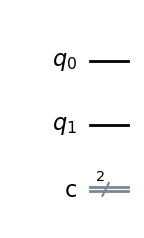

In [8]:
from qiskit import QuantumCircuit

MESSAGE = '00'

#Encode message
qc = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc.x(0)
if MESSAGE[-2]=='1':
    qc.x(1)

In [10]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

#Measure
qc_measure = QuantumCircuit(2,2)
qc_measure.measure([0,1],[0,1])

backend.run(qc.compose(qc_measure)).result().get_counts()


{'00': 1024}

In [11]:
from qiskit.quantum_info import Statevector

MESSAGE = '00'

#Encode message
qc = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc.x(0)
if MESSAGE[-2]=='1':
    qc.x(1)

qc.h(1)
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

$$ = \frac{\sqrt{2}}{2}\ket{00} + \frac{\sqrt{2}}{2}\ket{11}$$

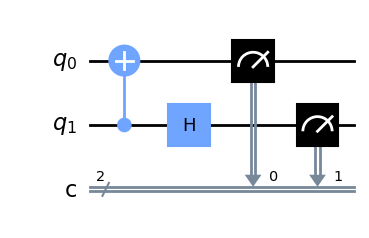

In [13]:
qc_measure = QuantumCircuit(2,2)
#Disentangle
qc_measure.cx(1,0)
qc_measure.h(1)

#Measures
qc_measure.measure([0,1],[0,1])

qc_measure.draw(output = 'mpl')

In [14]:
backend.run(qc.compose(qc_measure)).result().get_counts()

{'00': 1024}

In [21]:
MESSAGE = ['00', '01', '10', '11']

for i in range(len(MESSAGE)):

    print('MESSAGE: ' + MESSAGE[i])
    #Encode message
    qc = QuantumCircuit(2, 2)
    if MESSAGE[i][-1]=='1':
        qc.x(0)
    if MESSAGE[i][-2]=='1':
        qc.x(1)

    #Entangle
    qc.h(1)
    qc.cx(1,0)


    qc_measure = QuantumCircuit(2,2)

    #Disentangle
    qc_measure.cx(1,0)
    qc_measure.h(1)

    #Measures
    qc_measure.measure([0,1],[0,1])

    print('DECODED MESSAGE: ' + str(backend.run(qc.compose(qc_measure)).result().get_counts()))
    print('\n')


MESSAGE: 00
DECODED MESSAGE: {'00': 1024}


MESSAGE: 01
DECODED MESSAGE: {'01': 1024}


MESSAGE: 10
DECODED MESSAGE: {'10': 1024}


MESSAGE: 11
DECODED MESSAGE: {'11': 1024}


